In [154]:
import sqlite3
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(11.7,8.27)})
%matplotlib inline
plt.style.use('seaborn-dark')

In [127]:
# Create your connection.
cnx = sqlite3.connect('cities.db')

In [128]:
df = pd.read_sql_query("SELECT * FROM vehicles", cnx)

In [129]:
df.shape

(52171, 20)

In [130]:
df.size

1043420

In [131]:
df.head()

,url,city,price,year,manufacturer,make,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,image_url,lat,long
0,https://slo.craigslist.org/ctd/d/nipomo-2010-m...,slo,NaN,2010.0,mercury,mariner,None,None,gas,92155.0,clean,automatic,4M2CN8B73AKJ23489,fwd,None,SUV,blue,https://images.craigslist.org/00y0y_2DeHnxeUa7...,35.024220,-120.472180
1,https://slo.craigslist.org/cto/d/santa-barbara...,slo,NaN,2005.0,volvo,v70xc wagon,excellent,5 cylinders,gas,185000.0,clean,automatic,None,4wd,mid-size,wagon,blue,https://images.craigslist.org/00T0T_9qKOzTMmcX...,34.419700,-119.707800
2,https://slo.craigslist.org/ctd/d/san-luis-obis...,slo,NaN,2008.0,mazda,mazda3,None,None,gas,109528.0,clean,automatic,JM1BK32G781139577,None,None,sedan,silver,https://images.craigslist.org/00Q0Q_c5yeYN8gwA...,35.267013,-120.670023
3,https://slo.craigslist.org/ctd/d/templeton-200...,slo,NaN,2007.0,chevrolet,suburban,good,8 cylinders,gas,103000.0,clean,automatic,None,rwd,full-size,SUV,brown,https://images.craigslist.org/00S0S_cErMrUgwe1...,35.512448,-120.699771
4,https://slo.craigslist.org/ctd/d/templeton-200...,slo,NaN,2005.0,chevrolet,trailblazer,good,6 cylinders,gas,90000.0,clean,automatic,None,rwd,mid-size,SUV,silver,https://images.craigslist.org/00y0y_h7JL9b2AEy...,35.512566,-120.699729


In [132]:
df.price.isna().mean()

0.032930171934599684

In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52171 entries, 0 to 52170
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   url           52171 non-null  object 
 1   city          52171 non-null  object 
 2   price         50453 non-null  float64
 3   year          52006 non-null  float64
 4   manufacturer  49689 non-null  object 
 5   make          52162 non-null  object 
 6   condition     33415 non-null  object 
 7   cylinders     31424 non-null  object 
 8   fuel          52048 non-null  object 
 9   odometer      50749 non-null  float64
 10  title_status  50844 non-null  object 
 11  transmission  51914 non-null  object 
 12  VIN           33839 non-null  object 
 13  drive         37009 non-null  object 
 14  size          15139 non-null  object 
 15  type          42740 non-null  object 
 16  paint_color   35773 non-null  object 
 17  image_url     52162 non-null  object 
 18  lat           52119 non-nu

In [134]:
features = [
    'price',
    'city',
    'year',
    'manufacturer',
    'condition',
    'cylinders',
    'fuel',
    'odometer',
    'title_status',
    'transmission',
    'size',
    'paint_color',
]

df1 = df[features]

In [135]:
# df1.dropna(axis=0, inplace=True)

In [136]:
# df1.shape #(9606, 11)

In [137]:
df1.shape

(52171, 12)

In [138]:
df1.isna().sum()

price            1718
city                0
year              165
manufacturer     2482
condition       18756
cylinders       20747
fuel              123
odometer         1422
title_status     1327
transmission      257
size            37032
paint_color     16398
dtype: int64

In [139]:
features = [
    'price',
    'city',
    'year',
    'manufacturer',
    'fuel',
    'odometer',
    'title_status',
    'transmission',
]
cars = df1[features]

In [140]:
# normalizing values
cars.price = cars.price[~((cars.price - cars.price.mean()).abs() > 0.5 * cars.price.std())]
cars.odometer = cars.odometer[~((cars.odometer-cars.odometer.mean()).abs() > 5 * cars.odometer.std())]

/Users/stevalang/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5491: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/Users/stevalang/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5491: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [141]:
cars.dropna(axis=0, inplace=True)

<ipython-input-141-ab371721f56d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cars.dropna(axis=0, inplace=True)


In [142]:
cars.shape

(45332, 8)

cars.isna().sum()

In [159]:
cars.columns

Index(['price', 'city', 'year', 'manufacturer', 'fuel', 'odometer',
       'title_status', 'transmission'],
      dtype='object')

In [144]:
cars.describe(include=[np.object, pd.Categorical]).T

,count,unique,top,freq
city,45332,30,sacramento,2793
manufacturer,45332,39,ford,6893
fuel,45332,5,gas,37041
title_status,45332,6,clean,43881
transmission,45332,3,automatic,37257


In [145]:
# 39 unique manufacturers, 30 cities

array([<AxesSubplot:ylabel='manufacturer'>], dtype=object)

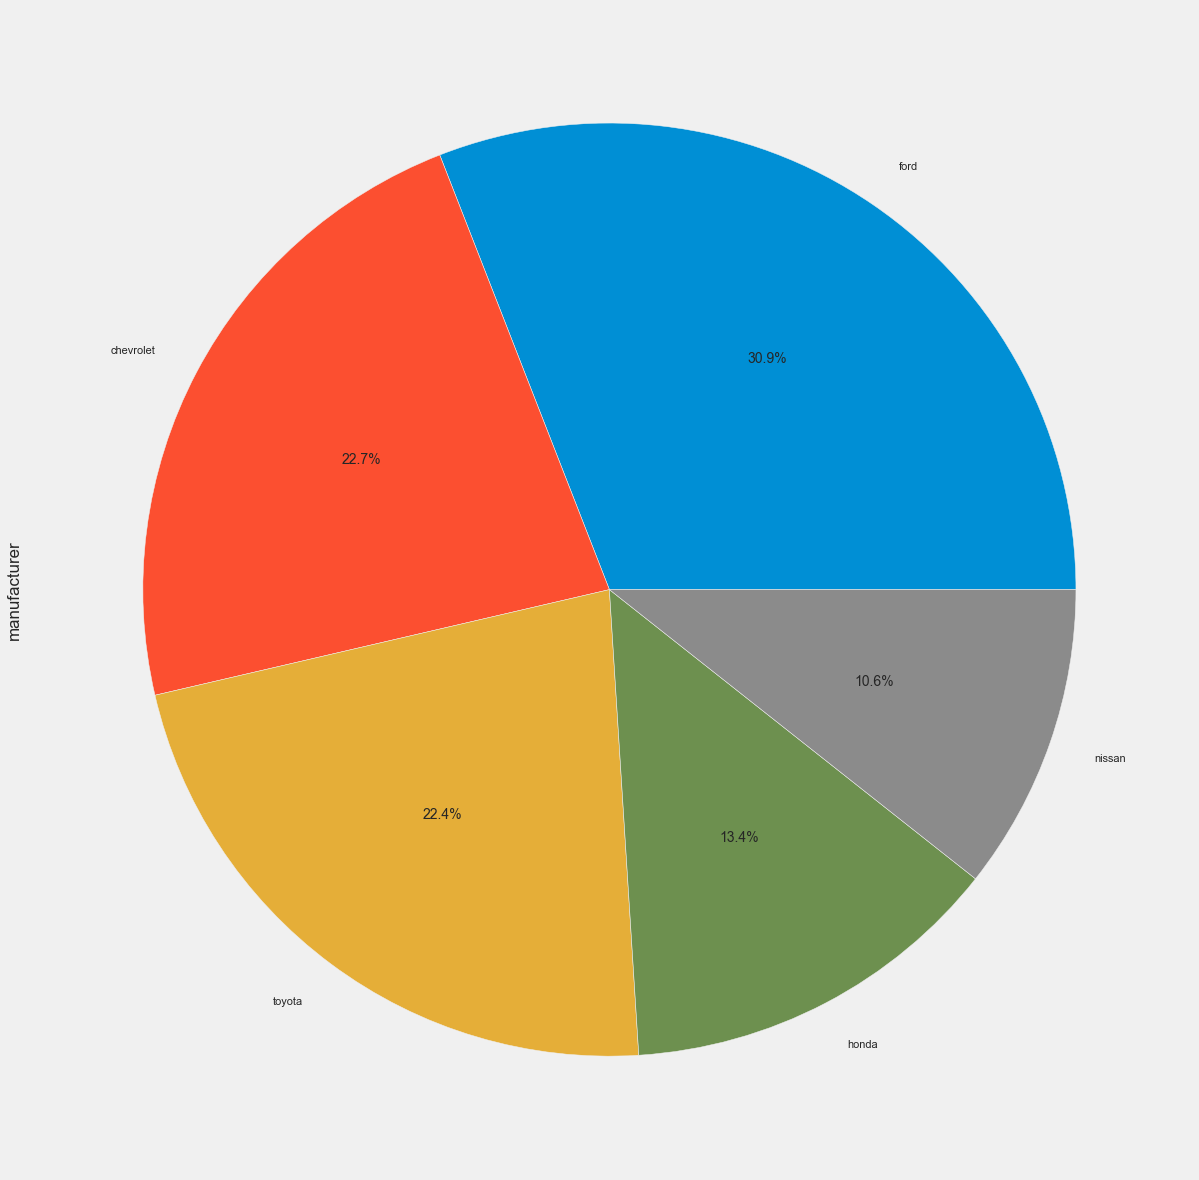

In [146]:
# The distribution of the top 5 car manufacturers.

cars.manufacturer.value_counts().head(5).plot(kind='pie', subplots=True, figsize=(20,20), autopct='%1.1f%%')

array([<AxesSubplot:title={'center':'manufacturer'}>], dtype=object)

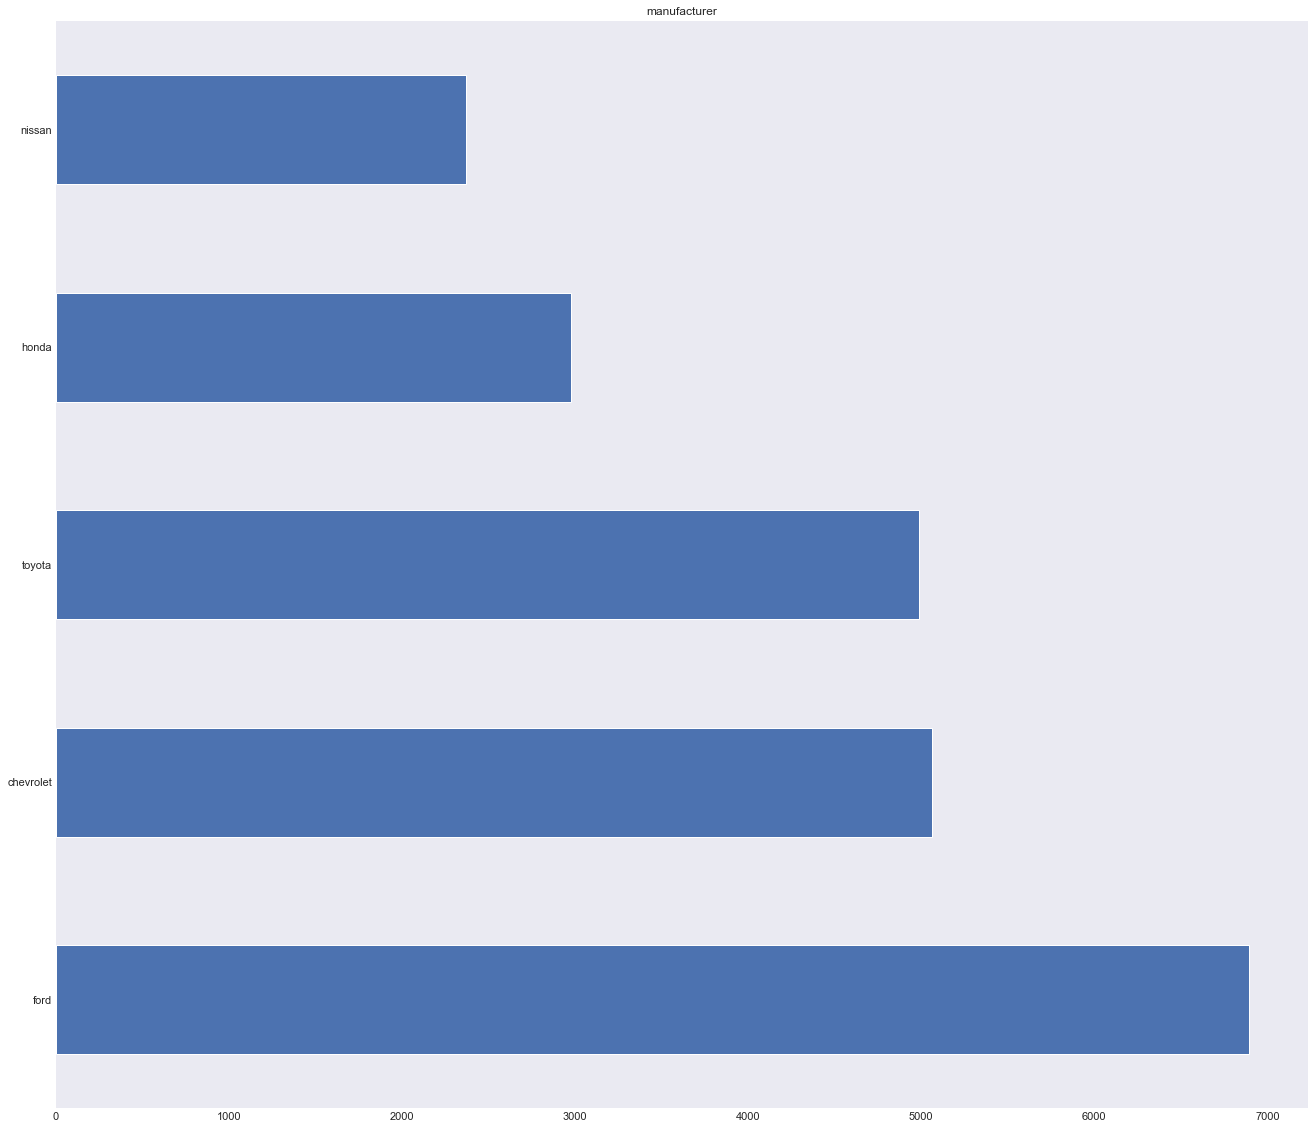

In [158]:
cars.manufacturer.value_counts().head(5).plot(kind='barh', subplots=True, figsize = (20,20))

From the graph we can see the distribution of the top 5 manufacturing companies within the dataset.If you prefer Ford vehicles, Ford has the highest number of vehicles available for purchase, meaning you have a large number of vehicles to choose from. They are followed by chevrolet and toyota. Nissan has the lowest number of cars available for sale, so persons who prefer this brand may have a lower chance of finding their ideal vehicle.

array([<AxesSubplot:ylabel='city'>], dtype=object)

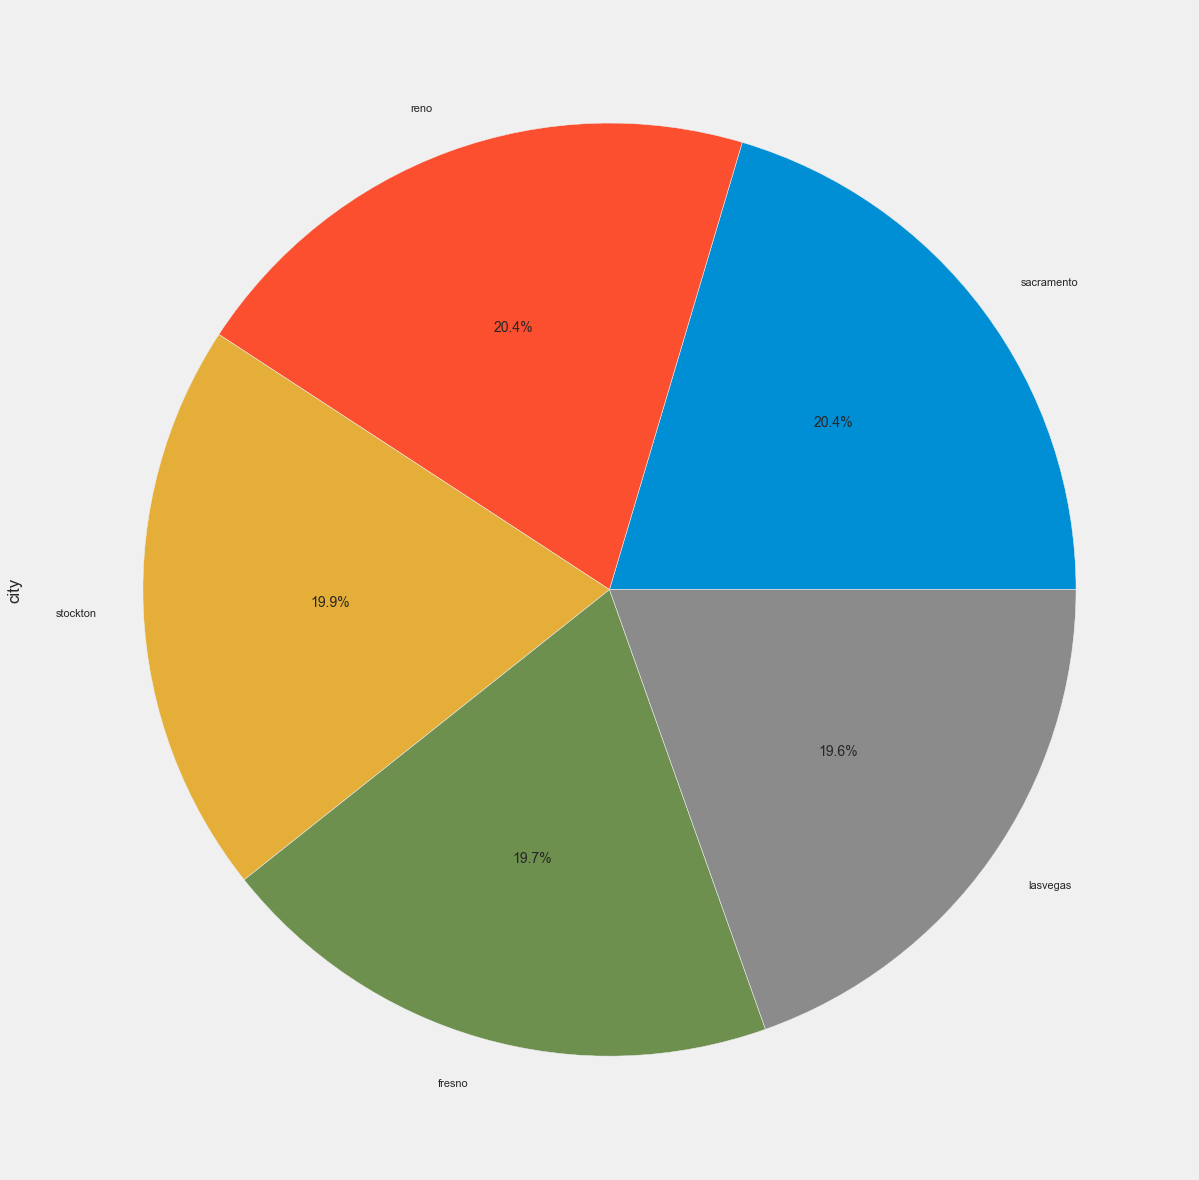

In [148]:
# The distribution of the top 5 cities to buy a car from.
cars.city.value_counts().head(5).plot(kind='pie', subplots=True, figsize=(20,20), autopct='%1.1f%%',)

array([<AxesSubplot:title={'center':'city'}>], dtype=object)

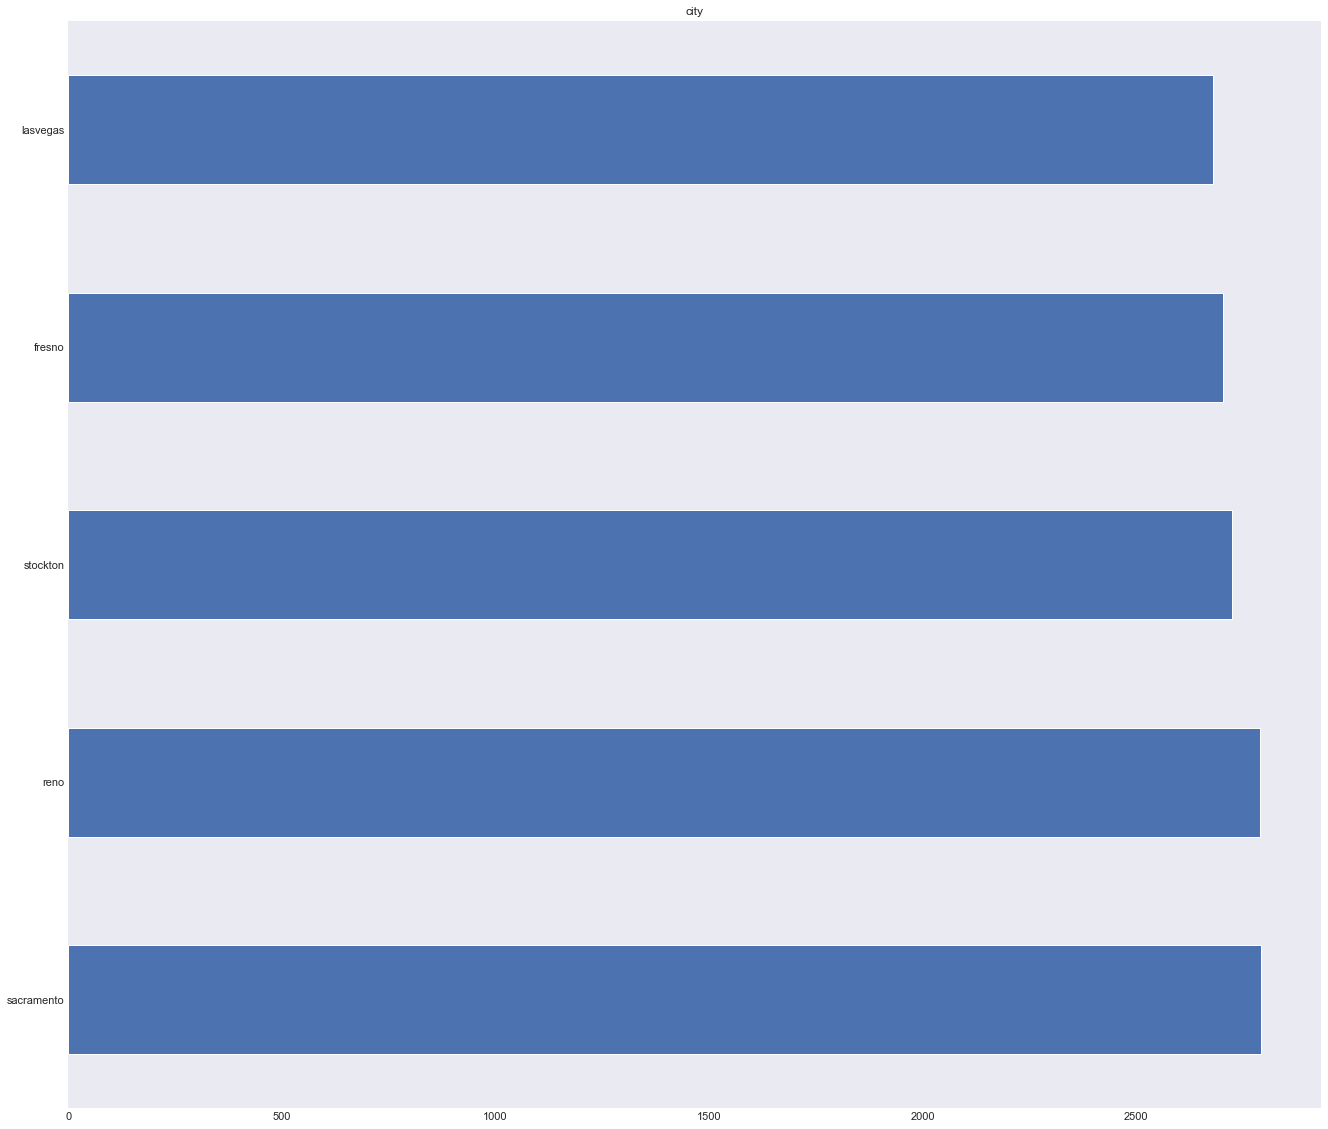

In [157]:
cars.city.value_counts().head(5).plot(kind='barh', subplots=True, figsize=(20,20))

<AxesSubplot:xlabel='count', ylabel='fuel'>

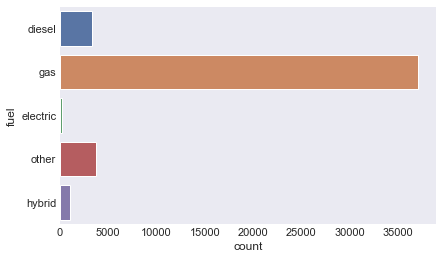

In [155]:
sns.countplot(y='fuel', data=cars)

<AxesSubplot:xlabel='count', ylabel='transmission'>

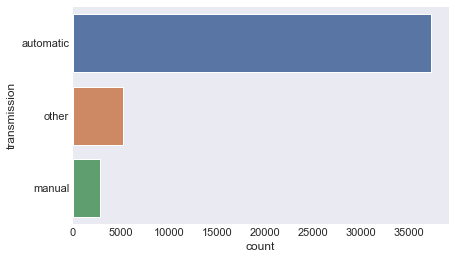

In [156]:
sns.countplot(y='transmission', data=cars)

## Find the best offer available using 5 features

* PRICE

* MANUFACTURER

* CITY

* TRANSMISSION

* YEAR


In [83]:
avg_price = cars['price']
avg_price.mean()

16151.64307773758

In [84]:
price = cars['price']
test_manufacturer = cars['manufacturer']
city = cars['city']
transmission = cars['transmission']
year = cars['year']

In [85]:
price.value_counts()

0.0         4099
6500.0       304
5500.0       280
9995.0       277
4500.0       277
            ... 
4290.0         1
34397.0        1
78900.0        1
23229.0        1
113900.0       1
Name: price, Length: 4021, dtype: int64

In [86]:
test_manufacturer.value_counts()

ford               6893
chevrolet          5063
toyota             4986
honda              2977
nissan             2372
bmw                2111
mercedes-benz      2021
ram                1811
jeep               1464
volkswagen         1449
gmc                1412
dodge              1323
hyundai            1323
lexus              1301
kia                1009
subaru              952
audi                911
mazda               657
acura               624
cadillac            619
infiniti            618
chrysler            596
mini                466
lincoln             329
volvo               327
buick               293
mitsubishi          284
jaguar              281
rover               276
pontiac             147
fiat                132
alfa-romeo           96
saturn               79
mercury              74
ferrari              20
datsun               17
harley-davidson      12
aston-martin          4
land rover            3
Name: manufacturer, dtype: int64

In [87]:
city.value_counts()

sacramento      2793
reno            2790
stockton        2723
fresno          2702
lasvegas        2679
orangecounty    2647
losangeles      2623
modesto         2564
redding         2563
inlandempire    2513
ventura         2493
bakersfield     2458
medford         1902
palmsprings     1871
chico           1481
yubasutter      1454
monterey        1451
santabarbara    1015
visalia          914
goldcountry      785
santamaria       735
merced           638
humboldt         387
klamath          289
mendocino        266
roseburg         213
hanford          179
siskiyou         103
susanville        78
slo               23
Name: city, dtype: int64

In [88]:
transmission.value_counts()

automatic    37257
other         5240
manual        2835
Name: transmission, dtype: int64

In [89]:
year.value_counts()

2017.0    3991
2018.0    3893
2015.0    3668
2014.0    3517
2016.0    3401
          ... 
1943.0       1
1945.0       1
1942.0       1
1922.0       1
1935.0       1
Name: year, Length: 98, dtype: int64

In [91]:
price_count = price.value_counts()
man_count = test_manufacturer.value_counts()
year_count = year.value_counts()
city_count = city.value_counts()
transmission_count = transmission.value_counts()

Text(0, 0.5, 'Mean Prices for each transmission')

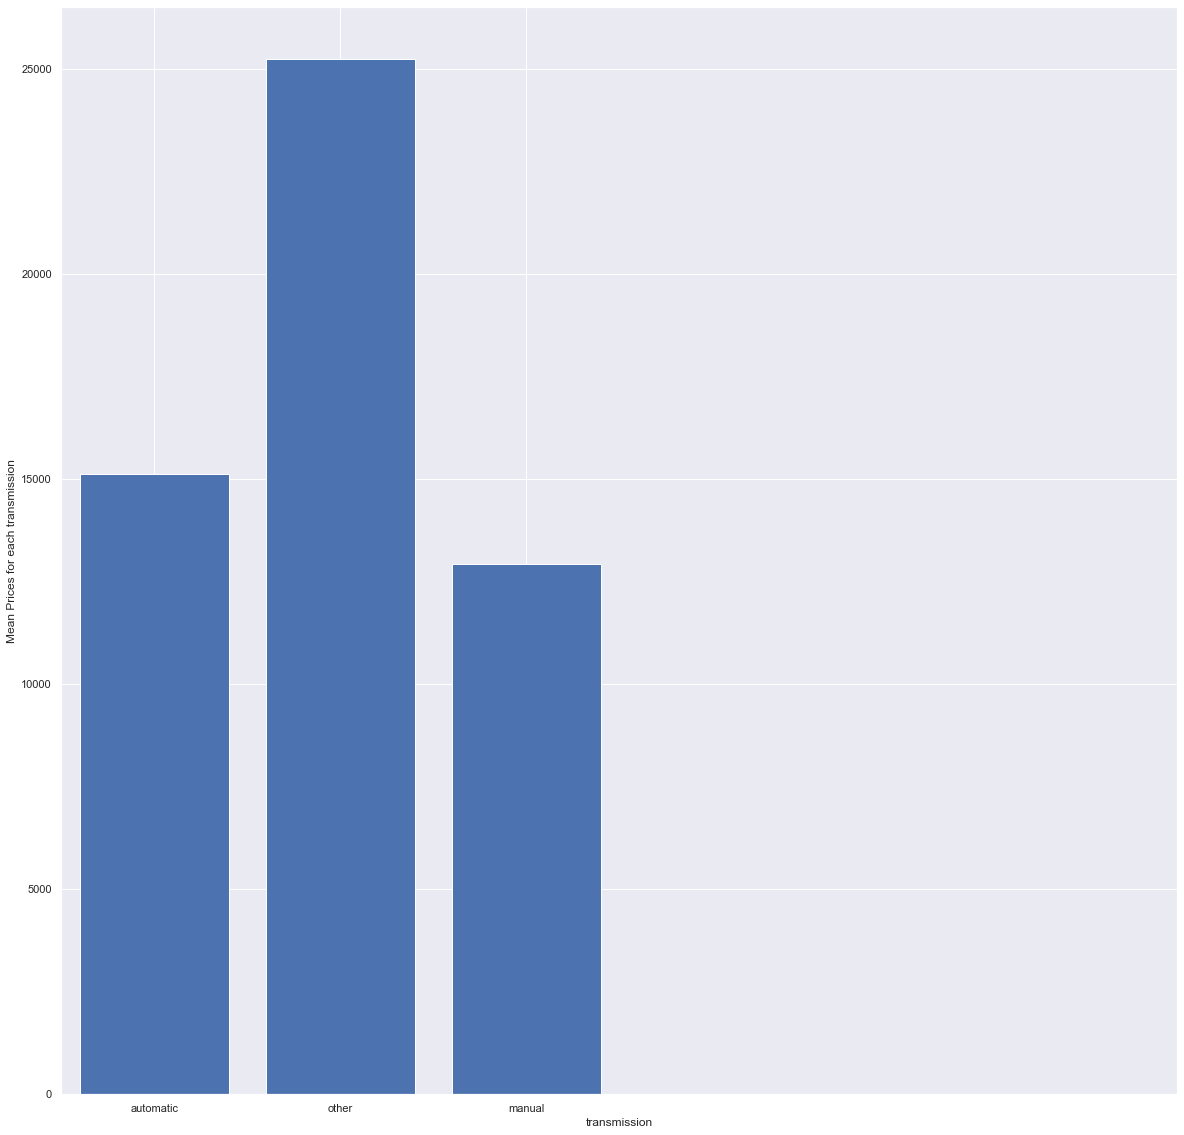

In [94]:
avg = cars.groupby('transmission', sort=False)['price'].mean()
bx = avg.plot(kind='bar', rot=0, figsize=(20, 20), width=.8)
bx.set_xlim(-.5, 5.5)
bx.set_ylabel('Mean Prices for each transmission')

Text(0, 0.5, 'Mean Prices for each car sales within each city')

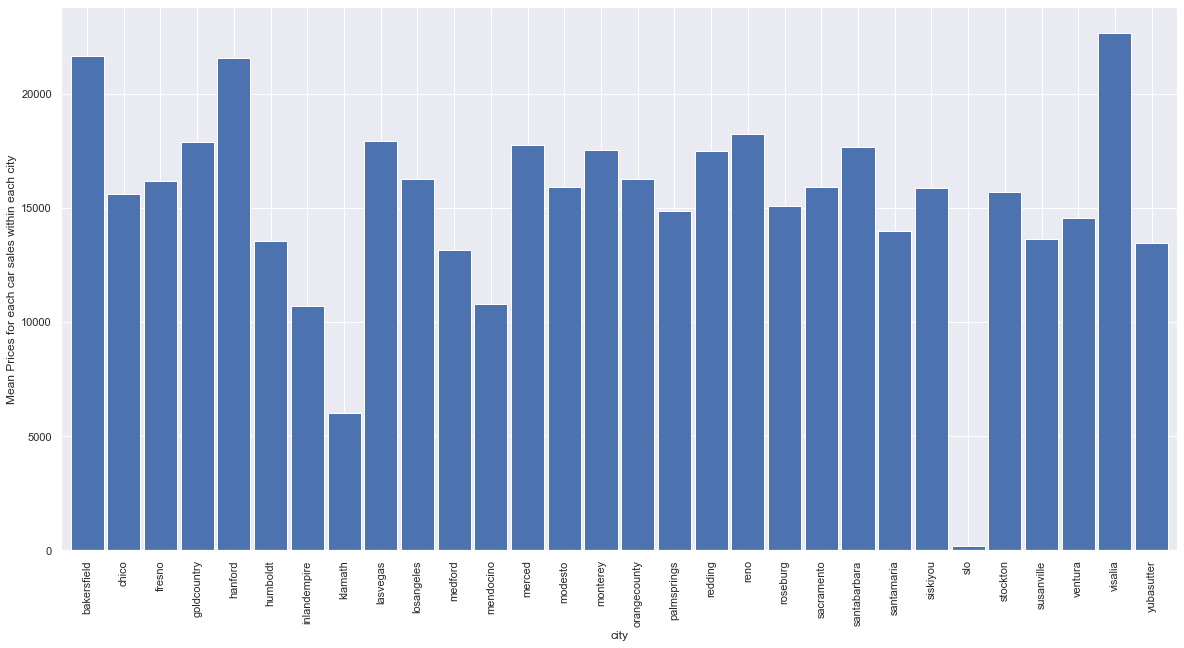

In [113]:
city_avg = cars.groupby('city')['price'].mean().round()
ax = city_avg.plot(kind='bar', figsize=(20,10), width=.9)
ax.set_ylabel('Mean Prices for each car sales within each city')

In [114]:
price.max()

380000.0

In [115]:
price.min()

0.0

Text(0, 0.5, 'Mean Prices for each manufacturer')

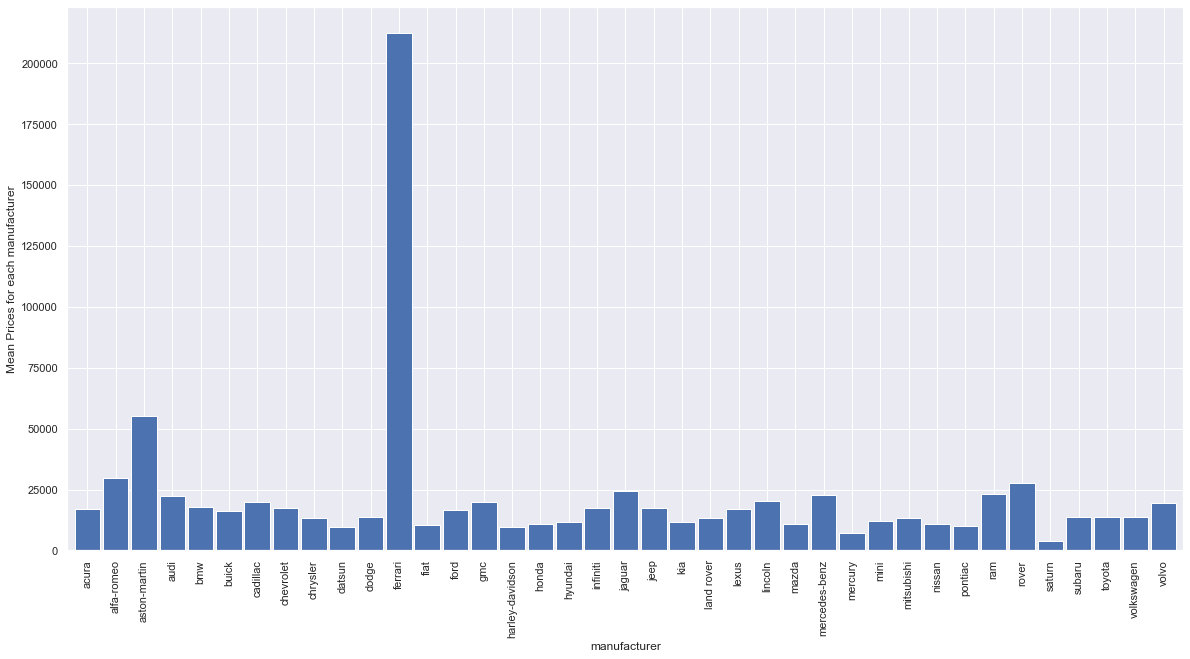

In [117]:
manufact = cars.groupby('manufacturer')['price'].mean().round()
ax = manufact.plot(kind='bar', rot=90, figsize=(20, 10), width=.9)
ax.set_ylabel('Mean Prices for each manufacturer')

This graph shows us the mean prices of cars for each manufacturer. Luxury vehicles such as ferrari, have a high average sales price of 200 000, followed by aston-martin with average 55 000. 

             price      year  odometer
price     1.000000  0.220764 -0.377704
year      0.220764  1.000000 -0.355097
odometer -0.377704 -0.355097  1.000000


<AxesSubplot:>

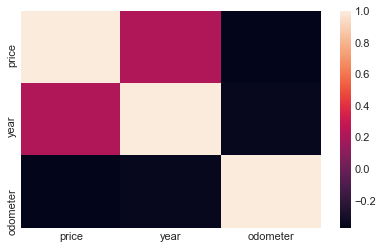

In [160]:
corr = cars.corr()
print(corr)

sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

All numeric variables' correlations are compared in this graph. Most variables aren't correlated at all, with the exception of moderate negative correlation between price and year, slight negative correlation between year and odometer, and slight positive correlation between year and price.